## Import Packages

In [1]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

import seaborn as sns
import matplotlib.pyplot as plt

### Create the Spark Session

In [2]:
spark = SparkSession.builder.getOrCreate()

### Read the CSV File

In [3]:
flights = spark.read.csv('flights_small.csv', header=True, inferSchema=True)

- Print Schema

In [4]:
flights.printSchema()

root
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- dep_time: string (nullable = true)
 |-- dep_delay: string (nullable = true)
 |-- arr_time: string (nullable = true)
 |-- arr_delay: string (nullable = true)
 |-- carrier: string (nullable = true)
 |-- tailnum: string (nullable = true)
 |-- flight: integer (nullable = true)
 |-- origin: string (nullable = true)
 |-- dest: string (nullable = true)
 |-- air_time: string (nullable = true)
 |-- distance: integer (nullable = true)
 |-- hour: string (nullable = true)
 |-- minute: string (nullable = true)



- Use show to print the top 10 rows

In [5]:
flights.show(10)

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2014|   12|  8|     658|       -7|     935|       -5|     VX| N846VA|  1780|   SEA| LAX|     132|     954|   6|    58|
|2014|    1| 22|    1040|        5|    1505|        5|     AS| N559AS|   851|   SEA| HNL|     360|    2677|  10|    40|
|2014|    3|  9|    1443|       -2|    1652|        2|     VX| N847VA|   755|   SEA| SFO|     111|     679|  14|    43|
|2014|    4|  9|    1705|       45|    1839|       34|     WN| N360SW|   344|   PDX| SJC|      83|     569|  17|     5|
|2014|    3|  9|     754|       -1|    1015|        1|     AS| N612AS|   522|   SEA| BUR|     127|     937|   7|    54|
|2014|    1| 15|    1037|        7|    1

- Get minor details about the data

In [6]:
print('There are {} rows in the dataset'.format(flights.count()))

print('There are {} columns and their names are \n {}'.format(len(flights.columns), flights.columns))

There are 10000 rows in the dataset
There are 16 columns and their names are 
 ['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute']


- Check and Drop Duplicates
    - There are no duplicates in the data.

In [7]:
flights_drop_dup = flights.dropDuplicates()

In [8]:
print('There are {} rows in the dataset'.format(flights_drop_dup.count()))

There are 10000 rows in the dataset


### Analysis 1: Get the Number of Flights for each airplane

In [9]:
flights_tail_num = flights.groupBy('tailnum') \
                    .agg(F.count('tailnum') \
                    .alias('number_of_flights'))
print('The total number of distinct airlplanes are {}'.format(flights_tail_num.count()))

flights_tail_num.orderBy('number_of_flights', ascending=False).show()

The total number of distinct airlplanes are 2252
+-------+-----------------+
|tailnum|number_of_flights|
+-------+-----------------+
| N612AS|               51|
| N219AG|               50|
| N224AG|               50|
| N218AG|               49|
| N223AG|               49|
| N611AS|               46|
| N225AG|               45|
| N607AS|               45|
| N435AS|               45|
| N615AS|               45|
| N794AS|               42|
| N627AS|               41|
| N644AS|               41|
| N215AG|               41|
| N216AG|               41|
| N413AS|               40|
| N619AS|               40|
| N625AS|               40|
| N622AS|               40|
| N626AS|               40|
+-------+-----------------+
only showing top 20 rows



In [23]:
flights_tail_num.write.parquet("flight_tails.parquet")

### Analysis 2: Get the total number of flights per carrier

In [26]:
carrier_num = flights.groupBy('carrier') \
                    .agg(F.count('carrier') \
                    .alias('numberofflights'))
print('The total number of distinct carriers are {}'.format(carrier_num.count()))

carrier_num.orderBy('numberofflights', ascending=False).show()

The total number of distinct carriers are 11
+-------+---------------+
|carrier|numberofflights|
+-------+---------------+
|     AS|           3784|
|     WN|           1394|
|     OO|           1186|
|     DL|           1082|
|     UA|           1051|
|     AA|            482|
|     US|            367|
|     B6|            214|
|     VX|            186|
|     F9|            181|
|     HA|             73|
+-------+---------------+



In [27]:
carrier_num.write.parquet("carrier_num.parquet")

- Get flight details for all flights having origin point SEA

In [11]:
sea_flights = flights.select('carrier', 'tailnum', 'flight', 'origin', 'dest').filter("origin == 'SEA'")
sea_flights.show()

+-------+-------+------+------+----+
|carrier|tailnum|flight|origin|dest|
+-------+-------+------+------+----+
|     VX| N846VA|  1780|   SEA| LAX|
|     AS| N559AS|   851|   SEA| HNL|
|     VX| N847VA|   755|   SEA| SFO|
|     AS| N612AS|   522|   SEA| BUR|
|     VX| N361VA|   755|   SEA| SFO|
|     AS| N309AS|   490|   SEA| SAN|
|     AS| N564AS|    26|   SEA| ORD|
|     AS| N323AS|   448|   SEA| LAX|
|     AS| N305AS|   656|   SEA| PHX|
|     AS| N433AS|   608|   SEA| LAS|
|     AS| N765AS|   121|   SEA| ANC|
|     AS| N713AS|   306|   SEA| SFO|
|     AS| N626AS|   368|   SEA| SMF|
|     WN| N8634A|   827|   SEA| MDW|
|     AS| N597AS|    24|   SEA| BOS|
|     AS| N519AS|   300|   SEA| SFO|
|     US| N127UW|   616|   SEA| PHL|
|     DL| N354NW|  2642|   SEA| LAX|
|     OO| N825SK|  4623|   SEA| SJC|
|     AS| N520AS|   306|   SEA| SFO|
+-------+-------+------+------+----+
only showing top 20 rows



### Analysis 3: Get the number of carriers, airlanes, flights and destinations of each carrier.

In [30]:
sea_carrier = sea_flights.groupBy('carrier').agg(F.count('carrier').alias('numberofcarriers'), 
                                                 F.countDistinct('tailnum').alias('distinctnumberofairplanes'), 
                                                 F.countDistinct('flight').alias('distinctnumberofflights'),
                                                 F.countDistinct('dest').alias('distinctnumberofdestination'))
sea_carrier.orderBy('numberofcarriers', ascending=False).show()

+-------+----------------+-------------------------+-----------------------+---------------------------+
|carrier|numberofcarriers|distinctnumberofairplanes|distinctnumberofflights|distinctnumberofdestination|
+-------+----------------+-------------------------+-----------------------+---------------------------+
|     AS|            2987|                      140|                    239|                         47|
|     DL|             757|                      282|                    139|                         14|
|     WN|             736|                      419|                    322|                         18|
|     UA|             706|                      335|                    261|                          8|
|     OO|             587|                      136|                    122|                         16|
|     AA|             336|                      180|                     35|                          5|
|     US|             229|                      123|   

In [31]:
sea_carrier.write.parquet("sea_carrier.parquet")

- Get flight details for all flights having origin point PDX

In [13]:
pdx_flights = flights.select('carrier', 'tailnum', 'flight', 'origin', 'dest').filter("origin == 'PDX'")
pdx_flights.show()

+-------+-------+------+------+----+
|carrier|tailnum|flight|origin|dest|
+-------+-------+------+------+----+
|     WN| N360SW|   344|   PDX| SJC|
|     WN| N646SW|    48|   PDX| DEN|
|     WN| N422WN|  1520|   PDX| OAK|
|     UA| N27205|  1458|   PDX| SFO|
|     OO| N215AG|  3488|   PDX| BUR|
|     OO| N218AG|  3456|   PDX| BUR|
|     WN| N793SA|  1617|   PDX| RNO|
|     OO| N951SW|  3456|   PDX| BUR|
|     OO| N223AG|  3492|   PDX| SLC|
|     F9| N204FR|   794|   PDX| DEN|
|     OO| N969SW|  5189|   PDX| SFO|
|     DL| N309US|  2164|   PDX| MSP|
|     US| N579UW|   630|   PDX| PHX|
|     US| N157UW|   630|   PDX| PHX|
|     AS| N799AS|   568|   PDX| LAX|
|     OO| N225AG|  3492|   PDX| SLC|
|     UA| N559UA|   732|   PDX| ORD|
|     OO| N569SW|  5411|   PDX| EUG|
|     OO| N918SW|  6328|   PDX| SFO|
|     AS| N459AS|   143|   PDX| ANC|
+-------+-------+------+------+----+
only showing top 20 rows



### Analysis 4: Get the number of carriers, airlanes, flights and destinations of each carrier.

In [14]:
pdx_carrier = pdx_flights.groupBy('carrier').agg(F.count('carrier').alias('number of carriers'), 
                                                 F.countDistinct('tailnum').alias('distinct number of airplanes'), 
                                                 F.countDistinct('flight').alias('distinct number of flights'),
                                                 F.countDistinct('dest').alias('distinct number of destination'))
pdx_carrier.orderBy('number of carriers', ascending=False).show()

+-------+------------------+----------------------------+--------------------------+------------------------------+
|carrier|number of carriers|distinct number of airplanes|distinct number of flights|distinct number of destination|
+-------+------------------+----------------------------+--------------------------+------------------------------+
|     AS|               797|                         132|                        63|                            21|
|     WN|               658|                         393|                       294|                            15|
|     OO|               599|                         170|                        85|                            14|
|     UA|               345|                         244|                       152|                             6|
|     DL|               325|                         198|                        63|                             5|
|     AA|               146|                         102|               

- Convert the date, year and date columns into datetime

In [15]:
dt = F.to_date(F.concat_ws("-", "Year", "Month", "Day"))

flight_new = flights.withColumn("date", dt)
flight_new.show(5)

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+----------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|      date|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+----------+
|2014|   12|  8|     658|       -7|     935|       -5|     VX| N846VA|  1780|   SEA| LAX|     132|     954|   6|    58|2014-12-08|
|2014|    1| 22|    1040|        5|    1505|        5|     AS| N559AS|   851|   SEA| HNL|     360|    2677|  10|    40|2014-01-22|
|2014|    3|  9|    1443|       -2|    1652|        2|     VX| N847VA|   755|   SEA| SFO|     111|     679|  14|    43|2014-03-09|
|2014|    4|  9|    1705|       45|    1839|       34|     WN| N360SW|   344|   PDX| SJC|      83|     569|  17|     5|2014-04-09|
|2014|    3|  9|     754|       -1|    1015|        1|     AS| N612AS|   522|   SEA

- Select specific columns to work with

In [16]:
flights_sel = flight_new.select('date','carrier', 'tailnum', 'flight', 'origin', 'dest')
flights_sel.show()

+----------+-------+-------+------+------+----+
|      date|carrier|tailnum|flight|origin|dest|
+----------+-------+-------+------+------+----+
|2014-12-08|     VX| N846VA|  1780|   SEA| LAX|
|2014-01-22|     AS| N559AS|   851|   SEA| HNL|
|2014-03-09|     VX| N847VA|   755|   SEA| SFO|
|2014-04-09|     WN| N360SW|   344|   PDX| SJC|
|2014-03-09|     AS| N612AS|   522|   SEA| BUR|
|2014-01-15|     WN| N646SW|    48|   PDX| DEN|
|2014-07-02|     WN| N422WN|  1520|   PDX| OAK|
|2014-05-12|     VX| N361VA|   755|   SEA| SFO|
|2014-04-19|     AS| N309AS|   490|   SEA| SAN|
|2014-11-19|     AS| N564AS|    26|   SEA| ORD|
|2014-11-08|     AS| N323AS|   448|   SEA| LAX|
|2014-08-03|     AS| N305AS|   656|   SEA| PHX|
|2014-10-30|     AS| N433AS|   608|   SEA| LAS|
|2014-11-12|     AS| N765AS|   121|   SEA| ANC|
|2014-10-31|     AS| N713AS|   306|   SEA| SFO|
|2014-01-29|     UA| N27205|  1458|   PDX| SFO|
|2014-12-17|     AS| N626AS|   368|   SEA| SMF|
|2014-08-11|     WN| N8634A|   827|   SE

### Analysis 5: Get the total number of flights in each day.

In [17]:
flights_day = flights_sel.groupBy('date').agg(F.count('flight').alias('number of flights'))
flights_day.orderBy('date', 'number of flights', ascending=False).show()

+----------+-----------------+
|      date|number of flights|
+----------+-----------------+
|2014-12-31|               25|
|2014-12-30|               23|
|2014-12-29|               29|
|2014-12-28|               30|
|2014-12-27|               34|
|2014-12-26|               30|
|2014-12-25|               21|
|2014-12-24|               23|
|2014-12-23|               26|
|2014-12-22|               25|
|2014-12-21|               38|
|2014-12-20|               27|
|2014-12-19|               29|
|2014-12-18|               26|
|2014-12-17|               31|
|2014-12-16|               21|
|2014-12-15|               21|
|2014-12-14|               22|
|2014-12-13|               25|
|2014-12-12|               23|
+----------+-----------------+
only showing top 20 rows



- Plot the figures

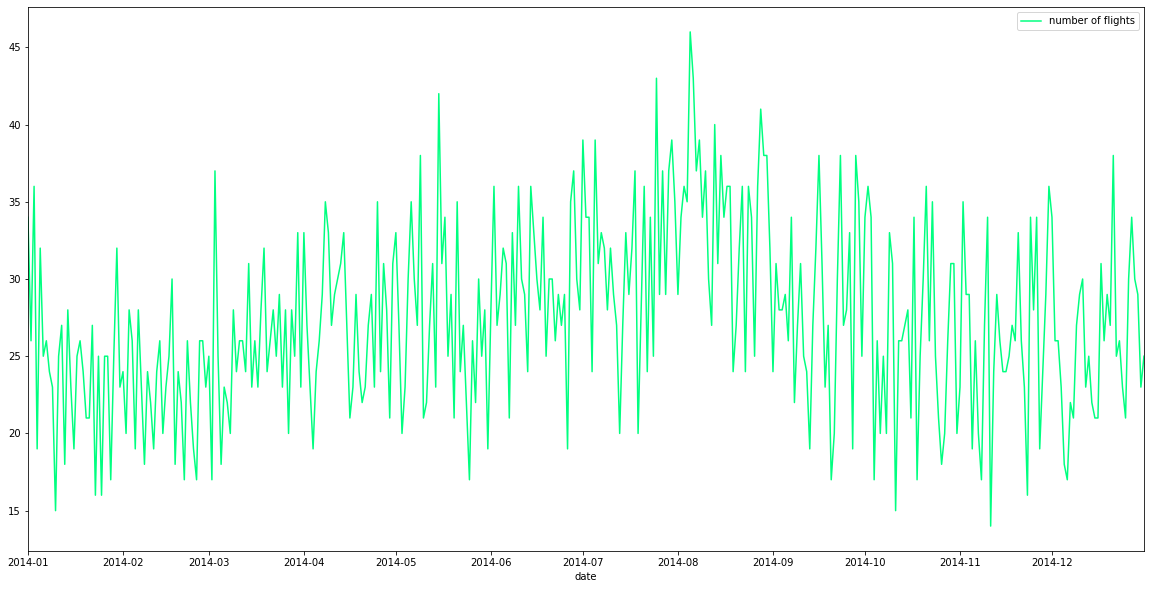

In [19]:
#flights_day =flights_day.toPandas()
ax = flights_day.plot(kind='line', x='date', y='number of flights', figsize=(20,10), colormap='winter_r')
plt.show()

### Analysis 6: Number of Flights that get to each destination in a day.

In [20]:
dest_num = flights_sel.groupBy('date', 'dest').agg(F.count('dest').alias('number of flights'))
dest_num.orderBy('date', 'number of flights', ascending=False).show(10)

+----------+----+-----------------+
|      date|dest|number of flights|
+----------+----+-----------------+
|2014-12-31| OAK|                3|
|2014-12-31| GEG|                2|
|2014-12-31| DFW|                2|
|2014-12-31| LAX|                2|
|2014-12-31| SFO|                2|
|2014-12-31| ANC|                2|
|2014-12-31| PHX|                2|
|2014-12-31| ONT|                1|
|2014-12-31| LGB|                1|
|2014-12-31| DCA|                1|
+----------+----+-----------------+
only showing top 10 rows



In [ ]:
# #dest_num =dest_num.toPandas()
# #ax = dest_num.plot(kind='bar', x='date', y='number of flights', hu figsize=(20,10), colormap='winter_r')
# sns.barplot(x='date', y='number of flights', hue='dest', data=dest_num)
# plt.show()

### Analysis 7: Number of flights from an origin in a day.

In [21]:
origin_num = flights_sel.groupBy('date', 'origin').agg(F.count('origin').alias('number of flights'))
origin_num.orderBy('date', 'number of flights', ascending=False).show(10)

+----------+------+-----------------+
|      date|origin|number of flights|
+----------+------+-----------------+
|2014-12-31|   SEA|               19|
|2014-12-31|   PDX|                6|
|2014-12-30|   SEA|               18|
|2014-12-30|   PDX|                5|
|2014-12-29|   SEA|               20|
|2014-12-29|   PDX|                9|
|2014-12-28|   SEA|               22|
|2014-12-28|   PDX|                8|
|2014-12-27|   SEA|               22|
|2014-12-27|   PDX|               12|
+----------+------+-----------------+
only showing top 10 rows



### Analysis 8: Number of flights from a carrier in a day.

In [22]:
carrier_num = flights_sel.groupBy('date', 'carrier').agg(F.count('carrier').alias('number of flights'))
carrier_num.orderBy('date', 'number of flights', ascending=False).show(10)

+----------+-------+-----------------+
|      date|carrier|number of flights|
+----------+-------+-----------------+
|2014-12-31|     AS|               12|
|2014-12-31|     WN|                4|
|2014-12-31|     AA|                2|
|2014-12-31|     US|                2|
|2014-12-31|     OO|                2|
|2014-12-31|     HA|                1|
|2014-12-31|     B6|                1|
|2014-12-31|     VX|                1|
|2014-12-30|     AS|               12|
|2014-12-30|     UA|                3|
+----------+-------+-----------------+
only showing top 10 rows



In [32]:
#carrier_num.write.parquet("carrier_num.parquet")